In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from sklearn.cluster import AgglomerativeClustering

In [3]:
Books = pd.read_csv("C:\\Users\\Admin\\Downloads\\csv\\book.csv")


In [4]:
Books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [6]:
Books.head(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


In [7]:
Books.tail(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1990,1,0,1,1,0,0,1,1,0,0,0
1991,0,0,0,0,0,1,0,0,0,0,0
1992,0,1,1,1,0,1,1,1,0,1,0
1993,0,0,0,0,0,0,0,0,0,0,0
1994,0,0,0,0,0,0,0,0,0,0,0
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0


In [8]:
Books.info

<bound method DataFrame.info of       ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  \
0            0         1        0         1       0       0        1   
1            1         0        0         0       0       0        0   
2            0         0        0         0       0       0        0   
3            1         1        1         0       1       0        1   
4            0         0        1         0       0       0        1   
...        ...       ...      ...       ...     ...     ...      ...   
1995         0         0        1         0       0       1        1   
1996         0         0        0         0       0       0        0   
1997         0         0        0         0       0       0        0   
1998         0         0        1         0       0       0        0   
1999         0         0        0         0       0       0        0   

      ItalCook  ItalAtlas  ItalArt  Florence  
0            0          0        0         0  
1        

In [9]:
Books.shape

(2000, 11)

In [10]:
Books.duplicated().sum()

1680

In [11]:
Books_d1 = Books.iloc[:,1:5]
Books_d1.head(10)

,YouthBks,CookBks,DoItYBks,RefBks
0,1,0,1,0
1,0,0,0,0
2,0,0,0,0
3,1,1,0,1
4,0,1,0,0
5,0,0,0,0
6,1,0,0,0
7,1,0,0,1
8,0,0,1,0
9,1,1,0,0


In [ ]:
# No data transformation/ pre-processing is required as the data is already in the trasactions format

In [13]:
# Support 10%
frequent_sets = apriori(Books,min_support = 0.1, use_colnames= True)
frequent_sets['length'] = frequent_sets['itemsets'].apply(lambda x : len(x))
frequent_sets

C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [14]:
# Confidence- 70%
rules = association_rules(frequent_sets, min_threshold=0.7)
rules[rules.lift >1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
5,"(YouthBks, ChildBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
6,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
7,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
8,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
9,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534


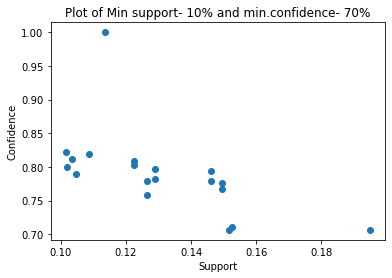

In [15]:
# visualization
plt.scatter('support','confidence', data= rules)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Plot of Min support- 10% and min.confidence- 70%')
plt.show()

In [ ]:
#2. Creating Association rules with 5% Support and 50% confidence
# Support 5%

In [16]:
# Support 5%
frequent_sets_1 = apriori(Books, min_support = 0.05, use_colnames= True)
frequent_sets_1['length'] = frequent_sets_1['itemsets'].apply(lambda x : len(x))
frequent_sets_1

C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
95,0.0600,"(YouthBks, GeogBks, DoItYBks, CookBks)",4
96,0.0560,"(YouthBks, GeogBks, ArtBks, CookBks)",4
97,0.0650,"(GeogBks, DoItYBks, ArtBks, CookBks)",4
98,0.0510,"(ChildBks, DoItYBks, GeogBks, YouthBks, CookBks)",5


In [17]:
# Confidence- 50%
rules_1 = association_rules(frequent_sets_1, min_threshold=0.5)
rules_1[rules_1.lift >1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
255,"(DoItYBks, ArtBks, ChildBks)","(GeogBks, CookBks)",0.0950,0.1925,0.0535,0.563158,2.925496,0.035212,1.848494
256,"(GeogBks, ArtBks, ChildBks)","(DoItYBks, CookBks)",0.1020,0.1875,0.0535,0.524510,2.797386,0.034375,1.708763
257,"(DoItYBks, ArtBks, GeogBks)","(CookBks, ChildBks)",0.0730,0.2560,0.0535,0.732877,2.862800,0.034812,2.785231
258,"(DoItYBks, ArtBks, CookBks)","(GeogBks, ChildBks)",0.1015,0.1950,0.0535,0.527094,2.703044,0.033708,1.702240


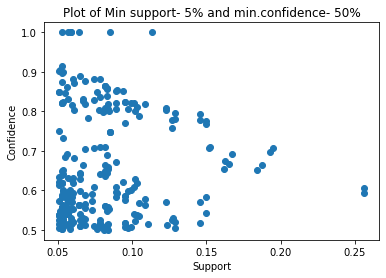

In [18]:
# visualization
plt.scatter('support','confidence', data= rules_1)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Plot of Min support- 5% and min.confidence- 50%')
plt.show()

In [ ]:
#3. Creating Association rules with 20% Support and 55% confidence

In [19]:
# Support 20%
frequent_sets_2 = apriori(Books,min_support = 0.2, use_colnames= True)
frequent_sets_2['length'] = frequent_sets_2['itemsets'].apply(lambda x : len(x))
frequent_sets_2

C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2


In [20]:
# Confidence- 55%
rules_2 = association_rules(frequent_sets_2, min_threshold=0.55)
rules_2[rules_2.lift >1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


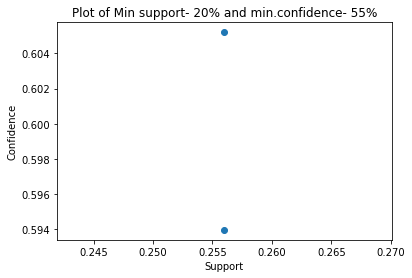

In [21]:
# visualization
plt.scatter('support','confidence', data= rules_2)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Plot of Min support- 20% and min.confidence- 55%')
plt.show()